In [31]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
nlp = spacy.load("en_core_web_sm")

import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [2]:
# no_pii_action_history_v2 = pd.read_json('no_pii_action_history_v2.json')
# no_pii_action_history_v2
# df.to_csv('no_pii_action_history_v2.csv')

In [90]:
f = open('no_pii_action_history_v2.json') 

data = json.load(f)
df=pd.json_normalize(data)

In [91]:
df

,_id,OfficerDetail,OfficerDetail_torg,Usercode,action_srno,action_status,do_code,document_id,flag,item_no,org_code,registration_no,remarks,torg,date_of_action.$date,delay,comment
0,MORLY/E/2023/0000001_1,None,None,None,1,00,None,None,None,NaN,C1TZN,MORLY/E/2023/0000001,None,MORLY,2023-01-01T00:00:00.000+0000,NaN,NaN
1,MORLY/E/2023/0000001_2,MAMTA SINGH (DEO),None,None,2,4T,None,None,None,NaN,MORLY,MORLY/E/2023/0000001,,ERLYS,2023-01-02T00:00:00.000+0000,0.0,NaN
2,MORLY/E/2023/0000001_3,Anindya Bandyopadhyay (Asstt. Secretary General),None,None,3,4T,None,None,None,NaN,ERLYS,MORLY/E/2023/0000001,Kindly arrange to examine the matter and disp...,SDAHD,2023-01-02T00:00:00.000+0000,0.0,NaN
3,MORLY/E/2023/0000001_4,Amit Shyam Roy (Asstt. Commercial Manager 1),None,None,4,4T,None,None,None,NaN,SDAHD,MORLY/E/2023/0000001,Please look into.,SDECO,2023-01-03T00:00:00.000+0000,1.0,NaN
4,MORLY/E/2023/0000001_5,Sri Kartik Singh (Sr. Divisional Engineer 1),None,None,5,40,None,None,None,NaN,SDECO,MORLY/E/2023/0000001,"As per railway record, there is no authorize...",SDECO,2023-01-04T00:00:00.000+0000,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091341,MODEF/E/2023/0000652_3,None,None,None,3,4T,None,None,None,NaN,TNGJS,MODEF/E/2023/0000652,Auto Forwarded,TNGDR,2023-01-31T00:00:00.000+0000,0.0,NaN
1091342,MODEF/E/2023/0000652_4,Shri Ashok Chakrapani (Deputy Secretary training),None,None,4,4T,None,None,None,NaN,TNGDR,MODEF/E/2023/0000652,Please take appropriate action in the matter ...,USNCC,2023-02-01T00:00:00.000+0000,1.0,NaN
1091343,MODEF/E/2023/0000652_1,None,None,None,1,00,None,None,None,NaN,C1TZN,MODEF/E/2023/0000652,None,MODEF,2023-01-31T00:00:00.000+0000,NaN,NaN
1091344,MODEF/E/2023/0000652_2,None,None,None,2,4T,None,None,None,NaN,MODEF,MODEF/E/2023/0000652,Auto Forwarded,TNGJS,2023-01-31T00:00:00.000+0000,0.0,NaN


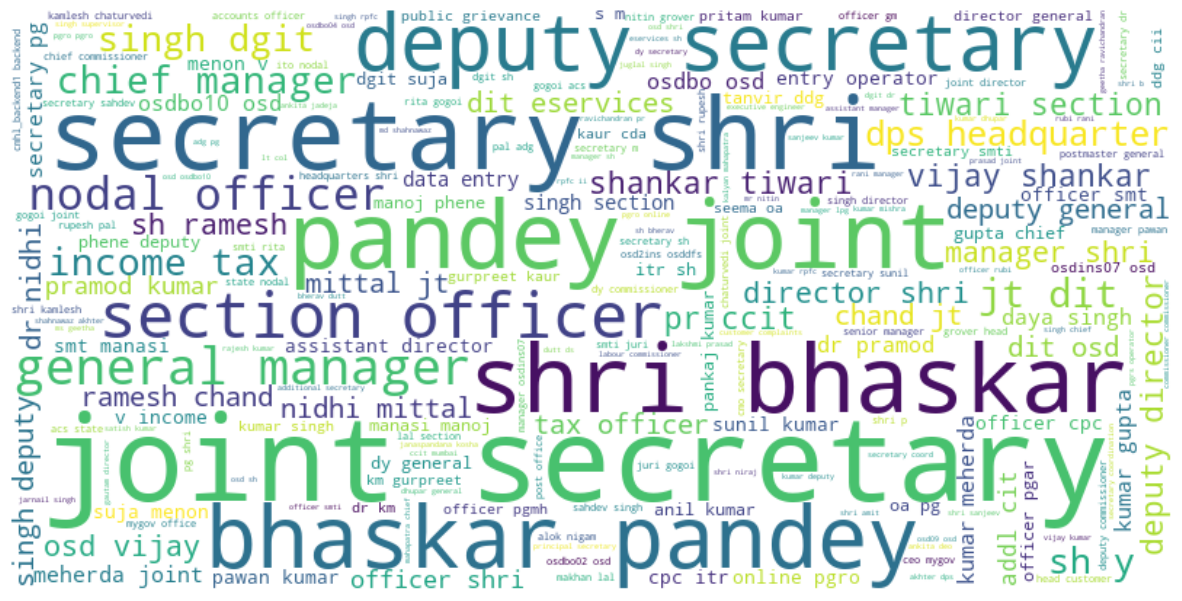

In [76]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# df['OfficerDetail'].fillna('', inplace=True)

# df['OfficerDetail_Cleaned'] = df['OfficerDetail'].str.lower().str.replace('[^\w\s]', '', regex=True)

# wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(df['OfficerDetail_Cleaned']))

# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [92]:
df

,_id,OfficerDetail,OfficerDetail_torg,Usercode,action_srno,action_status,do_code,document_id,flag,item_no,org_code,registration_no,remarks,torg,date_of_action.$date,delay,comment
0,MORLY/E/2023/0000001_1,None,None,None,1,00,None,None,None,NaN,C1TZN,MORLY/E/2023/0000001,None,MORLY,2023-01-01T00:00:00.000+0000,NaN,NaN
1,MORLY/E/2023/0000001_2,MAMTA SINGH (DEO),None,None,2,4T,None,None,None,NaN,MORLY,MORLY/E/2023/0000001,,ERLYS,2023-01-02T00:00:00.000+0000,0.0,NaN
2,MORLY/E/2023/0000001_3,Anindya Bandyopadhyay (Asstt. Secretary General),None,None,3,4T,None,None,None,NaN,ERLYS,MORLY/E/2023/0000001,Kindly arrange to examine the matter and disp...,SDAHD,2023-01-02T00:00:00.000+0000,0.0,NaN
3,MORLY/E/2023/0000001_4,Amit Shyam Roy (Asstt. Commercial Manager 1),None,None,4,4T,None,None,None,NaN,SDAHD,MORLY/E/2023/0000001,Please look into.,SDECO,2023-01-03T00:00:00.000+0000,1.0,NaN
4,MORLY/E/2023/0000001_5,Sri Kartik Singh (Sr. Divisional Engineer 1),None,None,5,40,None,None,None,NaN,SDECO,MORLY/E/2023/0000001,"As per railway record, there is no authorize...",SDECO,2023-01-04T00:00:00.000+0000,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091341,MODEF/E/2023/0000652_3,None,None,None,3,4T,None,None,None,NaN,TNGJS,MODEF/E/2023/0000652,Auto Forwarded,TNGDR,2023-01-31T00:00:00.000+0000,0.0,NaN
1091342,MODEF/E/2023/0000652_4,Shri Ashok Chakrapani (Deputy Secretary training),None,None,4,4T,None,None,None,NaN,TNGDR,MODEF/E/2023/0000652,Please take appropriate action in the matter ...,USNCC,2023-02-01T00:00:00.000+0000,1.0,NaN
1091343,MODEF/E/2023/0000652_1,None,None,None,1,00,None,None,None,NaN,C1TZN,MODEF/E/2023/0000652,None,MODEF,2023-01-31T00:00:00.000+0000,NaN,NaN
1091344,MODEF/E/2023/0000652_2,None,None,None,2,4T,None,None,None,NaN,MODEF,MODEF/E/2023/0000652,Auto Forwarded,TNGJS,2023-01-31T00:00:00.000+0000,0.0,NaN


In [93]:
summary_info = {}

for column in df.columns:
    num_nan = df[column].isna().sum()
    tot_num_entries = df[column].value_counts().sum()
    num_unique = df[column].nunique()
    lengths = df[column].dropna().astype(str).map(len)
    summary_info[column] = {
        'Number of NaN': num_nan,
        'Total number of valid entries':tot_num_entries,
        'Number of Unique Entries': num_unique,
        'Average Length of Entries': lengths.mean() if not lengths.empty else 0,
        'Min Length of Entries': lengths.min() if not lengths.empty else 0,
        'Max Length of Entries': lengths.max() if not lengths.empty else 0,
    }

summary_df = pd.DataFrame(summary_info).transpose()
summary_df

,Number of NaN,Total number of valid entries,Number of Unique Entries,Average Length of Entries,Min Length of Entries,Max Length of Entries
_id,0.0,1091346.0,1091346.0,22.103197,18.0,24.0
OfficerDetail,356875.0,734471.0,18191.0,32.320330,5.0,150.0
OfficerDetail_torg,1086277.0,5069.0,118.0,39.615901,13.0,70.0
Usercode,982710.0,108636.0,41.0,2.000000,2.0,2.0
action_srno,0.0,1091346.0,239.0,1.161222,1.0,3.0
action_status,0.0,1091346.0,23.0,2.000000,2.0,2.0
do_code,1040889.0,50457.0,2646.0,4.000000,4.0,4.0
document_id,990521.0,100825.0,95882.0,24.733905,0.0,43.0
flag,560532.0,530814.0,12.0,1.000000,1.0,1.0
item_no,895722.0,195624.0,231.0,3.160364,3.0,6.0


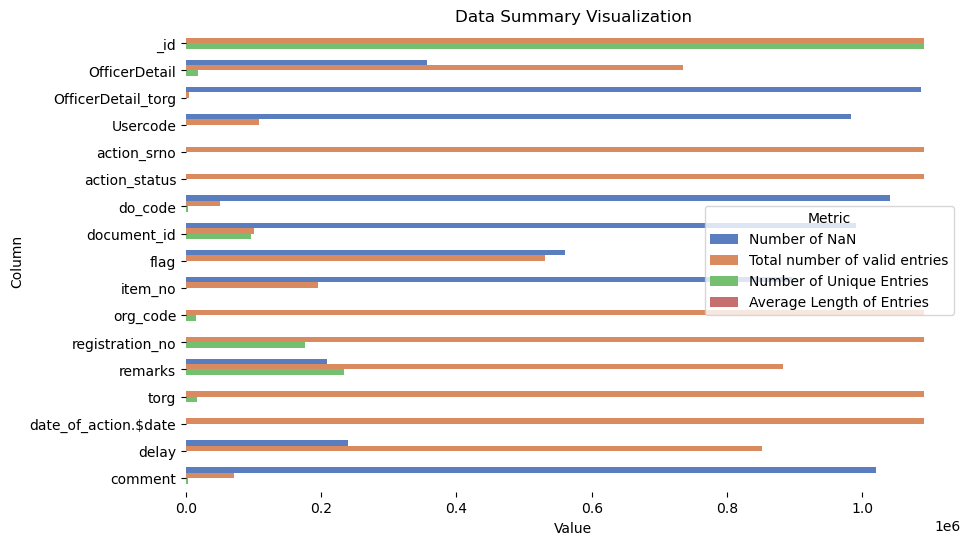

In [94]:
import seaborn as sns

visualization_df = pd.DataFrame({
    'Column': summary_df.index,
    'Number of NaN': summary_df['Number of NaN'],
    'Total number of valid entries':summary_df['Total number of valid entries'],
    'Number of Unique Entries': summary_df['Number of Unique Entries'],
    'Average Length of Entries': summary_df['Average Length of Entries']
}).reset_index(drop=True)

visualization_melted_df = pd.melt(visualization_df, id_vars='Column', var_name='Metric', value_name='Value')

f, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Value", y="Column", hue="Metric", data=visualization_melted_df,
            palette="muted", ax=ax)

ax.set_xlabel('Value')
ax.set_title('Data Summary Visualization')
sns.despine(left=True, bottom=True)

plt.show()

In [87]:
# df =df.drop(['Unnamed: 0'],axis=1)
# df =df.drop(['_id'],axis=1)
# df =df.drop(['OfficerDetail_torg'],axis=1)
# df =df.drop(['Usercode'],axis=1)
df =df.drop(['date_of_action.$date'],axis=1)
df =df.drop(['do_code'],axis=1)
df =df.drop(['document_id'],axis=1)
df =df.drop(['flag'],axis=1)
df =df.drop(['item_no'],axis=1)
df =df.drop(['delay'],axis=1)
df =df.drop(['comment'],axis=1)
df

,OfficerDetail,action_srno,action_status,org_code,registration_no,remarks,torg
0,unknown,1,00,C1TZN,MORLY/E/2023/0000001,None,MORLY
1,mamta singh (deo),2,4T,MORLY,MORLY/E/2023/0000001,,ERLYS
2,anindya bandyopadhyay (asstt. secretary general),3,4T,ERLYS,MORLY/E/2023/0000001,Kindly arrange to examine the matter and disp...,SDAHD
3,amit shyam roy (asstt. commercial manager 1),4,4T,SDAHD,MORLY/E/2023/0000001,Please look into.,SDECO
4,sri kartik singh (sr. divisional engineer 1),5,40,SDECO,MORLY/E/2023/0000001,"As per railway record, there is no authorize...",SDECO
...,...,...,...,...,...,...,...
1091341,unknown,3,4T,TNGJS,MODEF/E/2023/0000652,Auto Forwarded,TNGDR
1091342,shri ashok chakrapani (deputy secretary training),4,4T,TNGDR,MODEF/E/2023/0000652,Please take appropriate action in the matter ...,USNCC
1091343,unknown,1,00,C1TZN,MODEF/E/2023/0000652,None,MODEF
1091344,unknown,2,4T,MODEF,MODEF/E/2023/0000652,Auto Forwarded,TNGJS


In [88]:
summary_info = {}

for column in df.columns:
    num_nan = df[column].isna().sum()
    tot_num_entries = df[column].value_counts().sum()
    num_unique = df[column].nunique()
    lengths = df[column].dropna().astype(str).map(len)
    summary_info[column] = {
        'Number of NaN': num_nan,
        'Total number of valid entries':tot_num_entries,
        'Number of Unique Entries': num_unique,
        'Average Length of Entries': lengths.mean() if not lengths.empty else 0,
        'Min Length of Entries': lengths.min() if not lengths.empty else 0,
        'Max Length of Entries': lengths.max() if not lengths.empty else 0,
    }

summary_df = pd.DataFrame(summary_info).transpose()
summary_df

,Number of NaN,Total number of valid entries,Number of Unique Entries,Average Length of Entries,Min Length of Entries,Max Length of Entries
OfficerDetail,0.0,1091346.0,18078.0,24.040469,5.0,150.0
action_srno,0.0,1091346.0,239.0,1.161222,1.0,3.0
action_status,0.0,1091346.0,23.0,2.000000,2.0,2.0
org_code,0.0,1091346.0,14343.0,5.000000,5.0,5.0
registration_no,0.0,1091346.0,175784.0,19.941975,16.0,20.0
remarks,209021.0,882325.0,234472.0,164.240555,0.0,3985.0
torg,398.0,1090948.0,16125.0,5.000000,5.0,5.0


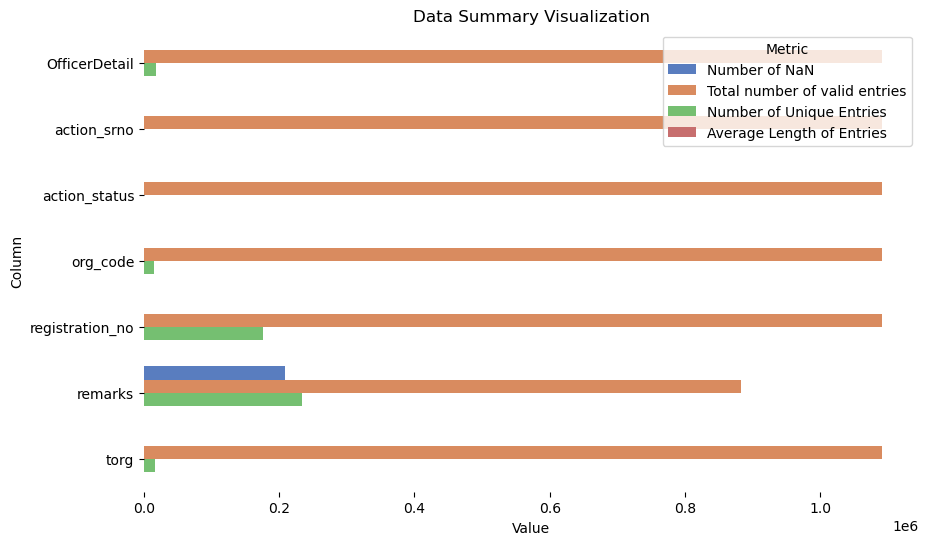

In [89]:
import seaborn as sns

visualization_df = pd.DataFrame({
    'Column': summary_df.index,
    'Number of NaN': summary_df['Number of NaN'],
    'Total number of valid entries':summary_df['Total number of valid entries'],
    'Number of Unique Entries': summary_df['Number of Unique Entries'],
    'Average Length of Entries': summary_df['Average Length of Entries']
}).reset_index(drop=True)

visualization_melted_df = pd.melt(visualization_df, id_vars='Column', var_name='Metric', value_name='Value')

f, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Value", y="Column", hue="Metric", data=visualization_melted_df,
            palette="muted", ax=ax)

ax.set_xlabel('Value')
ax.set_title('Data Summary Visualization')
sns.despine(left=True, bottom=True)

plt.show()

In [79]:
f = open('no_pii_action_history_v2.json') 

data = json.load(f)
df=pd.json_normalize(data)

df['OfficerDetail'].fillna('Unknown', inplace=True)

duplicates_removed = df.duplicated().sum()
if duplicates_removed > 0:
    df.drop_duplicates(inplace=True)

df['OfficerDetail'] = df['OfficerDetail'].str.strip().str.lower()

cleaned_data_head = df.head()
cleaned_data_head, duplicates_removed


(                      _id                                     OfficerDetail  \
 0  MORLY/E/2023/0000001_1                                           unknown   
 1  MORLY/E/2023/0000001_2                                 mamta singh (deo)   
 2  MORLY/E/2023/0000001_3  anindya bandyopadhyay (asstt. secretary general)   
 3  MORLY/E/2023/0000001_4      amit shyam roy (asstt. commercial manager 1)   
 4  MORLY/E/2023/0000001_5      sri kartik singh (sr. divisional engineer 1)   
 
   OfficerDetail_torg Usercode  action_srno action_status do_code document_id  \
 0               None     None            1            00    None        None   
 1               None     None            2            4T    None        None   
 2               None     None            3            4T    None        None   
 3               None     None            4            4T    None        None   
 4               None     None            5            40    None        None   
 
    flag  item_no org_code    

In [80]:
cleaned_data_head

,_id,OfficerDetail,OfficerDetail_torg,Usercode,action_srno,action_status,do_code,document_id,flag,item_no,org_code,registration_no,remarks,torg,date_of_action.$date,delay,comment
0,MORLY/E/2023/0000001_1,unknown,None,None,1,00,None,None,None,NaN,C1TZN,MORLY/E/2023/0000001,None,MORLY,2023-01-01T00:00:00.000+0000,NaN,NaN
1,MORLY/E/2023/0000001_2,mamta singh (deo),None,None,2,4T,None,None,None,NaN,MORLY,MORLY/E/2023/0000001,,ERLYS,2023-01-02T00:00:00.000+0000,0.0,NaN
2,MORLY/E/2023/0000001_3,anindya bandyopadhyay (asstt. secretary general),None,None,3,4T,None,None,None,NaN,ERLYS,MORLY/E/2023/0000001,Kindly arrange to examine the matter and disp...,SDAHD,2023-01-02T00:00:00.000+0000,0.0,NaN
3,MORLY/E/2023/0000001_4,amit shyam roy (asstt. commercial manager 1),None,None,4,4T,None,None,None,NaN,SDAHD,MORLY/E/2023/0000001,Please look into.,SDECO,2023-01-03T00:00:00.000+0000,1.0,NaN
4,MORLY/E/2023/0000001_5,sri kartik singh (sr. divisional engineer 1),None,None,5,40,None,None,None,NaN,SDECO,MORLY/E/2023/0000001,"As per railway record, there is no authorize...",SDECO,2023-01-04T00:00:00.000+0000,1.0,NaN


In [83]:
duplicates_removed

0

In [84]:
df[['OfficerDetail']].head(100000)

,OfficerDetail
0,unknown
1,mamta singh (deo)
2,anindya bandyopadhyay (asstt. secretary general)
3,amit shyam roy (asstt. commercial manager 1)
4,sri kartik singh (sr. divisional engineer 1)
...,...
99995,unknown
99996,colonel ajaypal singh (director coord div)
99997,shri prashant kumar panda (deputy secretary pers)
99998,col rajeev nayan singh (col ms legal)


In [72]:
df2 = df.dropna(subset=['remarks'], inplace=True)
print(df2)

None


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df2.remarks]
plt.hist(doc_lens, bins = 50)
plt.title('Distribution of Remarks character length')
plt.ylabel('Number of Complaint')
plt.xlabel('Complaint character length')
sns.despine();

AttributeError: 'NoneType' object has no attribute 'remarks'

<Figure size 1000x600 with 0 Axes>

In [44]:
from sklearn.decomposition import NMF

In [34]:
no_pii_action_history_v2 = pd.read_csv('no_pii_action_history_v2.csv',low_memory=False)

In [35]:
no_pii_action_history_v2

,Unnamed: 0,_id,OfficerDetail,OfficerDetail_torg,Usercode,action_srno,action_status,date_of_action,do_code,document_id,flag,item_no,org_code,registration_no,remarks,torg,delay,comment
0,0,MORLY/E/2023/0000001_1,NaN,NaN,NaN,1.0,00,{'$date': '2023-01-01T00:00:00.000+0000'},NaN,NaN,NaN,NaN,C1TZN,MORLY/E/2023/0000001,NaN,MORLY,NaN,NaN
1,1,MORLY/E/2023/0000001_2,MAMTA SINGH (DEO),NaN,NaN,2.0,4T,{'$date': '2023-01-02T00:00:00.000+0000'},NaN,NaN,NaN,NaN,MORLY,MORLY/E/2023/0000001,,ERLYS,0.0,NaN
2,2,MORLY/E/2023/0000001_3,Anindya Bandyopadhyay (Asstt. Secretary General),NaN,NaN,3.0,4T,{'$date': '2023-01-02T00:00:00.000+0000'},NaN,NaN,NaN,NaN,ERLYS,MORLY/E/2023/0000001,Kindly arrange to examine the matter and disp...,SDAHD,0.0,NaN
3,3,MORLY/E/2023/0000001_4,Amit Shyam Roy (Asstt. Commercial Manager 1),NaN,NaN,4.0,4T,{'$date': '2023-01-03T00:00:00.000+0000'},NaN,NaN,NaN,NaN,SDAHD,MORLY/E/2023/0000001,Please look into.,SDECO,1.0,NaN
4,4,MORLY/E/2023/0000001_5,Sri Kartik Singh (Sr. Divisional Engineer 1),NaN,NaN,5.0,40,{'$date': '2023-01-04T00:00:00.000+0000'},NaN,NaN,NaN,NaN,SDECO,MORLY/E/2023/0000001,"As per railway record, there is no authorize...",SDECO,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091361,1091341,MODEF/E/2023/0000652_3,NaN,NaN,NaN,3.0,4T,{'$date': '2023-01-31T00:00:00.000+0000'},NaN,NaN,NaN,NaN,TNGJS,MODEF/E/2023/0000652,Auto Forwarded,TNGDR,0.0,NaN
1091362,1091342,MODEF/E/2023/0000652_4,Shri Ashok Chakrapani (Deputy Secretary training),NaN,NaN,4.0,4T,{'$date': '2023-02-01T00:00:00.000+0000'},NaN,NaN,NaN,NaN,TNGDR,MODEF/E/2023/0000652,Please take appropriate action in the matter ...,USNCC,1.0,NaN
1091363,1091343,MODEF/E/2023/0000652_1,NaN,NaN,NaN,1.0,00,{'$date': '2023-01-31T00:00:00.000+0000'},NaN,NaN,NaN,NaN,C1TZN,MODEF/E/2023/0000652,NaN,MODEF,NaN,NaN
1091364,1091344,MODEF/E/2023/0000652_2,NaN,NaN,NaN,2.0,4T,{'$date': '2023-01-31T00:00:00.000+0000'},NaN,NaN,NaN,NaN,MODEF,MODEF/E/2023/0000652,Auto Forwarded,TNGJS,0.0,NaN


In [10]:
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['Unnamed: 0'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['_id'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['OfficerDetail_torg'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['Usercode'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['date_of_action'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['do_code'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['document_id'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['flag'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['item_no'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['delay'],axis=1)
no_pii_action_history_v2 =no_pii_action_history_v2.drop(['comment'],axis=1)
no_pii_action_history_v2

,OfficerDetail,action_srno,action_status,org_code,registration_no,remarks,torg
0,NaN,1.0,00,C1TZN,MORLY/E/2023/0000001,NaN,MORLY
1,MAMTA SINGH (DEO),2.0,4T,MORLY,MORLY/E/2023/0000001,,ERLYS
2,Anindya Bandyopadhyay (Asstt. Secretary General),3.0,4T,ERLYS,MORLY/E/2023/0000001,Kindly arrange to examine the matter and disp...,SDAHD
3,Amit Shyam Roy (Asstt. Commercial Manager 1),4.0,4T,SDAHD,MORLY/E/2023/0000001,Please look into.,SDECO
4,Sri Kartik Singh (Sr. Divisional Engineer 1),5.0,40,SDECO,MORLY/E/2023/0000001,"As per railway record, there is no authorize...",SDECO
...,...,...,...,...,...,...,...
1091361,NaN,3.0,4T,TNGJS,MODEF/E/2023/0000652,Auto Forwarded,TNGDR
1091362,Shri Ashok Chakrapani (Deputy Secretary training),4.0,4T,TNGDR,MODEF/E/2023/0000652,Please take appropriate action in the matter ...,USNCC
1091363,NaN,1.0,00,C1TZN,MODEF/E/2023/0000652,NaN,MODEF
1091364,NaN,2.0,4T,MODEF,MODEF/E/2023/0000652,Auto Forwarded,TNGJS


In [18]:
no_pii_action_history_v2['_id'].isna().sum()

10

In [21]:
no_pii_action_history_v2['_id'].value_counts()

_id
C1TZN                      10
MORLY/E/2023/0000001_1      1
DOPPW/E/2023/0002426_7      1
DOPPW/E/2023/0002426_13     1
DOPPW/E/2023/0002426_12     1
                           ..
CBODT/E/2023/0002077_12     1
CBODT/E/2023/0002077_13     1
CBODT/E/2023/0002077_14     1
CBODT/E/2023/0002077_15     1
MODEF/E/2023/0000652_5      1
Name: count, Length: 1091347, dtype: int64

In [ ]:
no_pii_grievance_v2 = pd.read_json('no_pii_grievance_v2.json')